## Eliminate from (general) A to (upper triangular) U

Demonstrate Gaussian Elimination (page 51 of GS)

(Reminder: Julia programming syntax will not be tested in this class, but that doesn't mean you can't learn from watching the code being executed)

In [1]:
using Plots

In [4]:
# nice viz for matrices
function lookat(A; redrow=0, rounding=2, showtext=true)
  n = size(A,1)
  plot(legend=false, axis=false)
  rowcolor = redrow > 0 ? :red : :black  
  for i=1:n, j=1:n  
      scatter!( [j],[i], ann=  showtext ? (j,i,round(A[i,j],digits=rounding), :white ) : (j,i,"") ,
                color=abs(A[i,j]) > .0001 ? (i==redrow ? rowcolor : :black) : :white, 
                marker=:square, markersize=30, aspectratio=1, yflip=true, yaxis=[.5,n+.5],xaxis=[.5,n+.5])
  end
  plot!()
end

lookat (generic function with 1 method)

In [9]:
A = [2 12 4 7; 29 12 69 24 ; 7 7 7 7; 3 7 5 2]
A = A*1.0

4×4 Array{Float64,2}:
  2.0  12.0   4.0   7.0
 29.0  12.0  69.0  24.0
  7.0   7.0   7.0   7.0
  3.0   7.0   5.0   2.0

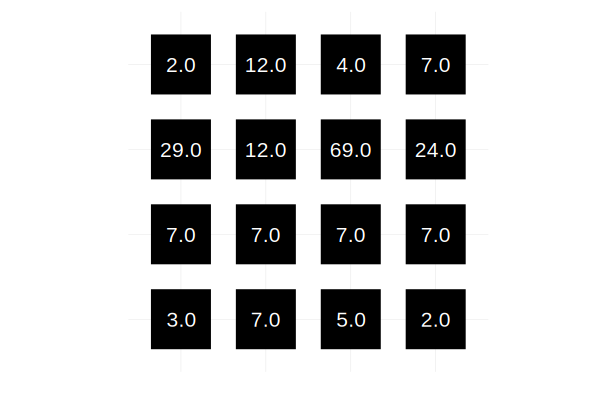

In [10]:
lookat(A)

## What multiple of the first row must i subtract from the second row to zero out the (2,1) entry?

In [6]:
L = fill(0.0, 4,4)

4×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [7]:
L[2,1] = A[2,1]/A[1,1]

14.5

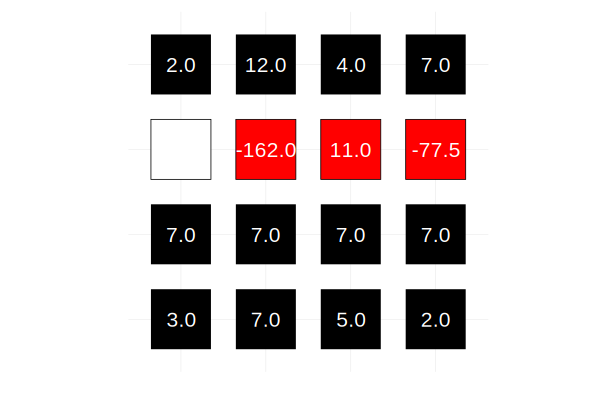

In [11]:
A[2,:] -= L[2,1]*A[1,:]; # subtract the multiplier times the first row from the second row
lookat(A, redrow=2)

In [12]:
L[3,1] = A[3,1]/A[1,1] # the diagonal entry that we divide by is called the "pivot"

3.5

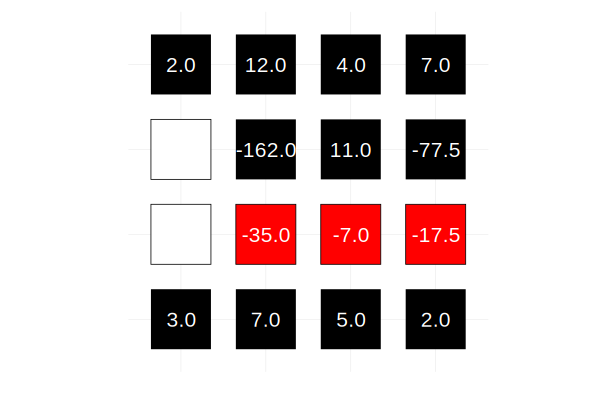

In [13]:
A[3,:] -= L[3,1]*A[1,:]; # subtract the multiplier times the first row from the second row
lookat(A, redrow=3)

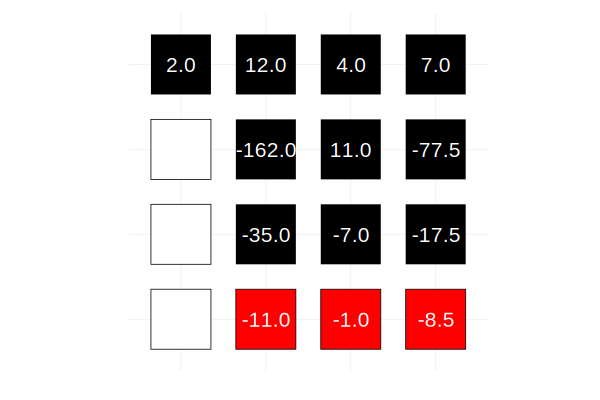

In [14]:
L[4,1] = A[4,1]/A[1,1] 
A[4,:] -= L[4,1]*A[1,:]; # subtract the multiplier times the first row from the second row
lookat(A, redrow=4)

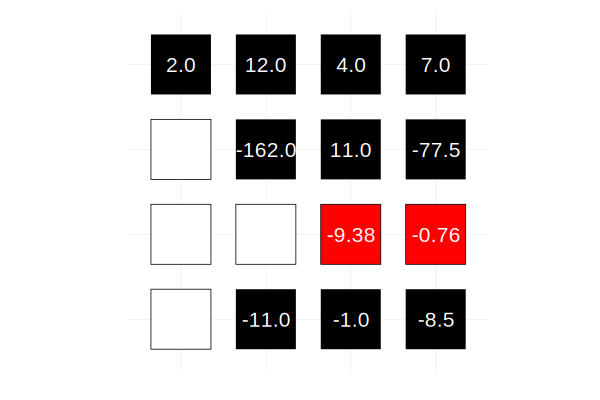

In [15]:
L[3,2] = A[3,2]/A[2,2] 
A[3,:] -= L[3,2]*A[2,:]; # subtract the multiplier times the first row from the second row
lookat(A, redrow=3)

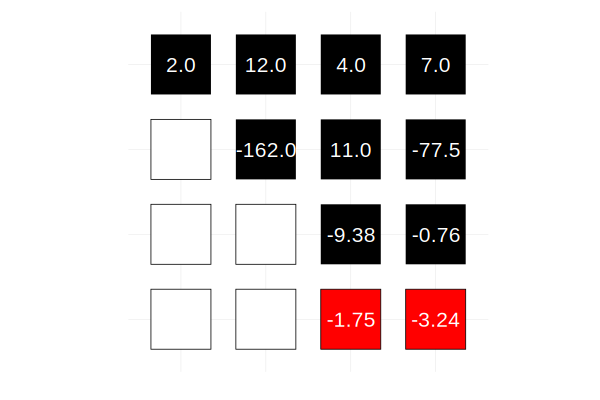

In [16]:
L[4,2] = A[4,2]/A[2,2] 
A[4,:] -= L[4,2]*A[2,:]; # subtract the multiplier times the first row from the second row
lookat(A, redrow=4)

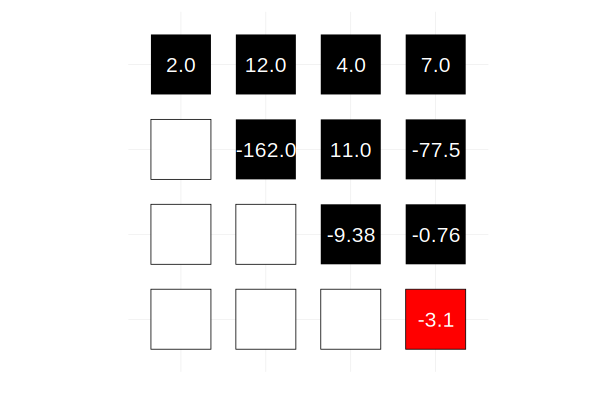

In [17]:
L[4,3] = A[4,3]/A[3,3] 
A[4,:] -= L[4,3]*A[3,:]; # subtract the multiplier times the first row from the second row
lookat(A, redrow=4)

In [27]:
n = 6
A = rand(n,n)
keepA = [copy(A)]
row = [0]
L = fill(0.0,n,n)
for j=1:n, i=j+1:n
    L[i,j] = A[i,j] / A[j,j]
    A[i,:] -= L[i,j] * A[j,:]
    push!(keepA,copy(A))
    push!(row,i)
end

In [28]:
using Interact

In [29]:
@manipulate for i =1: length(keepA)
    lookat( keepA[i], redrow=row[i])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 16,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
8, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/alanedelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/alanedelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/alanedelman/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/alanedelman/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/alanedelman/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011760e650, Task (runnable) @0x000000011760e650), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"12019567677823032763\",\"id\":\"ob_18\",\"type\":\"obser

In [30]:
using LinearAlgebra

In [33]:
A = keepA[1]

6×6 Array{Float64,2}:
 0.601848  0.719816   0.0549105  0.664714   0.184826  0.856158
 0.373551  0.503678   0.964187   0.613921   0.840482  0.349087
 0.139154  0.146278   0.0863354  0.315124   0.982249  0.226666
 0.176656  0.560782   0.473594   0.625323   0.164821  0.457171
 0.919038  0.751709   0.0796167  0.569861   0.793574  0.418587
 0.288685  0.0699438  0.0534446  0.0420711  0.788685  0.921932

In [34]:
U = keepA[end]

6×6 Array{Float64,2}:
  0.601848     0.719816   0.0549105  0.664714   0.184826      0.856158 
 -5.55112e-17  0.0569073  0.930105   0.201351   0.725765     -0.182307 
 -1.96573e-17  0.0        0.403003   0.232736   1.19652      -0.0358447
  8.46105e-17  0.0        0.0        2.22829   11.2549        0.858134 
  3.25219e-17  0.0        0.0        0.0        0.685981     -0.537103 
  3.55852e-18  0.0        0.0        0.0       -5.55112e-17   1.1249   

In [35]:
L

6×6 Array{Float64,2}:
 0.0        0.0         0.0      0.0       0.0       0.0
 0.620673   0.0         0.0      0.0       0.0       0.0
 0.231211  -0.354114    0.0      0.0       0.0       0.0
 0.293522   6.14156   -13.0392   0.0       0.0       0.0
 1.52703   -6.10589    14.0815  -1.11881   0.0       0.0
 0.479664  -4.83816    11.2334  -0.860311  0.660471  0.0

In [36]:
L += I

6×6 Array{Float64,2}:
 1.0        0.0         0.0      0.0       0.0       0.0
 0.620673   1.0         0.0      0.0       0.0       0.0
 0.231211  -0.354114    1.0      0.0       0.0       0.0
 0.293522   6.14156   -13.0392   1.0       0.0       0.0
 1.52703   -6.10589    14.0815  -1.11881   1.0       0.0
 0.479664  -4.83816    11.2334  -0.860311  0.660471  1.0

## First view of the LU decomposition

In [37]:
A

6×6 Array{Float64,2}:
 0.601848  0.719816   0.0549105  0.664714   0.184826  0.856158
 0.373551  0.503678   0.964187   0.613921   0.840482  0.349087
 0.139154  0.146278   0.0863354  0.315124   0.982249  0.226666
 0.176656  0.560782   0.473594   0.625323   0.164821  0.457171
 0.919038  0.751709   0.0796167  0.569861   0.793574  0.418587
 0.288685  0.0699438  0.0534446  0.0420711  0.788685  0.921932

In [38]:
L * U

6×6 Array{Float64,2}:
 0.601848  0.719816   0.0549105  0.664714   0.184826  0.856158
 0.373551  0.503678   0.964187   0.613921   0.840482  0.349087
 0.139154  0.146278   0.0863354  0.315124   0.982249  0.226666
 0.176656  0.560782   0.473594   0.625323   0.164821  0.457171
 0.919038  0.751709   0.0796167  0.569861   0.793574  0.418587
 0.288685  0.0699438  0.0534446  0.0420711  0.788685  0.921932

In [39]:
A ≈ L * U

true

In [40]:
A = [2 12 4 7; 29 12 69 24 ; 7 7 7 7; 3 7 5 2]

4×4 Array{Int64,2}:
  2  12   4   7
 29  12  69  24
  7   7   7   7
  3   7   5   2

In [41]:
A'


4×4 Adjoint{Int64,Array{Int64,2}}:
  2  29  7  3
 12  12  7  7
  4  69  7  5
  7  24  7  2

In [42]:
A= [ 1 2 3; 4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [43]:
A'



3×2 Adjoint{Int64,Array{Int64,2}}:
 1  4
 2  5
 3  6

In [44]:
dump(A')

Adjoint{Int64,Array{Int64,2}}
  parent: Array{Int64}((2, 3)) [1 2 3; 4 5 6]


In [45]:
A = rand( 1:9, 2,3,4)

2×3×4 Array{Int64,3}:
[:, :, 1] =
 2  8  3
 7  5  3

[:, :, 2] =
 7  5  8
 3  4  5

[:, :, 3] =
 4  2  8
 8  4  2

[:, :, 4] =
 8  3  8
 7  4  9

In [46]:
permutedims(A, [3 2 1])

4×3×2 Array{Int64,3}:
[:, :, 1] =
 2  8  3
 7  5  8
 4  2  8
 8  3  8

[:, :, 2] =
 7  5  3
 3  4  5
 8  4  2
 7  4  9

In [47]:
inv( rand(4,6))

DimensionMismatch: DimensionMismatch("matrix is not square: dimensions are (4, 6)")

In [48]:
A = rand(3,3)

3×3 Array{Float64,2}:
 0.961711  0.705796  0.334855 
 0.825322  0.76569   0.0211825
 0.22131   0.162853  0.357397 

In [49]:
B = rand(3,3)

3×3 Array{Float64,2}:
 0.466144  0.282758  0.176453 
 0.804355  0.748308  0.9467   
 0.764508  0.457893  0.0473501

In [50]:
inv( A*B )

3×3 Array{Float64,2}:
  110.378   -81.0345  -112.35  
 -191.261   138.822    201.288 
   50.3087  -34.295    -57.3957

In [51]:
inv(B) * inv(A)

3×3 Array{Float64,2}:
  110.378   -81.0345  -112.35  
 -191.261   138.822    201.288 
   50.3087  -34.295    -57.3957

In [52]:
x = 1:10


1:10

In [53]:
x * x'

10×10 Array{Int64,2}:
  1   2   3   4   5   6   7   8   9   10
  2   4   6   8  10  12  14  16  18   20
  3   6   9  12  15  18  21  24  27   30
  4   8  12  16  20  24  28  32  36   40
  5  10  15  20  25  30  35  40  45   50
  6  12  18  24  30  36  42  48  54   60
  7  14  21  28  35  42  49  56  63   70
  8  16  24  32  40  48  56  64  72   80
  9  18  27  36  45  54  63  72  81   90
 10  20  30  40  50  60  70  80  90  100

In [63]:
x =[ 1 ,2 ,4, 5]

4-element Array{Int64,1}:
 1
 2
 4
 5

In [64]:
y = [ 2, 4, 6]

3-element Array{Int64,1}:
 2
 4
 6

In [66]:
x * y'

4×3 Array{Int64,2}:
  2   4   6
  4   8  12
  8  16  24
 10  20  30